Gabriel Avinaz

Week 6

4/17/23

## Assignment 6.2
### Assignment 6.2.a

In [146]:
from keras.datasets import cifar10
from keras import layers, models, optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [147]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape == (50000, 32, 32, 3))
print(x_test.shape == (10000, 32, 32, 3))
print(y_train.shape == (50000, 1))
print(y_test.shape == (10000, 1))

num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


x_train = x_train / 255
x_test = x_test / 255

True
True
True
True


In [148]:
model = models.Sequential()

# example of a 3-block vgg style architecture
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_66 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_67 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_68 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_69 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                

In [149]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate=0.001), metrics=['acc'])

In [150]:
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_datagen.fit(x_train)
test_datagen.fit(x_test)

train_generator = train_datagen.flow(x_train, y_train, batch_size=64)

validation_generator = test_datagen.flow(x_test, y_test, batch_size=64)

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (64, 32, 32, 3)
labels batch shape: (64, 10)


In [151]:
history = model.fit(train_generator, steps_per_epoch=64, epochs=120, validation_data=(validation_generator), validation_steps=64)

Epoch 1/120
64/64 [==============================] - 6s 73ms/step - loss: 2.2751 - acc: 0.1772 - val_loss: 1.9723 - val_acc: 0.2830
Epoch 2/120
64/64 [==============================] - 4s 65ms/step - loss: 1.8927 - acc: 0.3115 - val_loss: 1.7496 - val_acc: 0.3513
Epoch 3/120
64/64 [==============================] - 4s 67ms/step - loss: 1.7446 - acc: 0.3667 - val_loss: 1.7517 - val_acc: 0.3611
Epoch 4/120
64/64 [==============================] - 4s 64ms/step - loss: 1.6263 - acc: 0.3997 - val_loss: 1.5365 - val_acc: 0.4531
Epoch 5/120
64/64 [==============================] - 4s 67ms/step - loss: 1.5381 - acc: 0.4375 - val_loss: 1.4117 - val_acc: 0.4907
Epoch 6/120
64/64 [==============================] - 4s 64ms/step - loss: 1.4472 - acc: 0.4768 - val_loss: 1.3534 - val_acc: 0.5098
Epoch 7/120
64/64 [==============================] - 4s 63ms/step - loss: 1.3955 - acc: 0.5076 - val_loss: 1.3164 - val_acc: 0.5239
Epoch 8/120
64/64 [==============================] - 6s 90ms/step - loss: 1.

In [152]:
model.save('results/cifar10_model.h5')

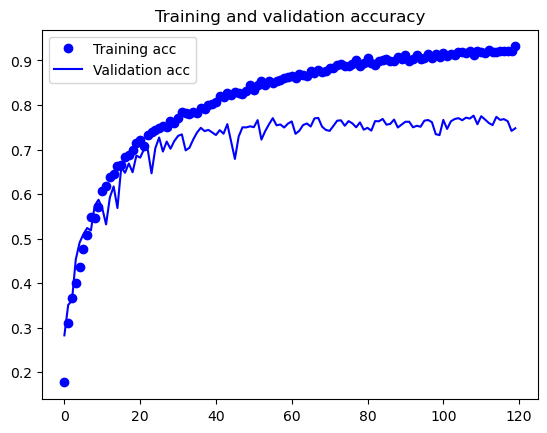

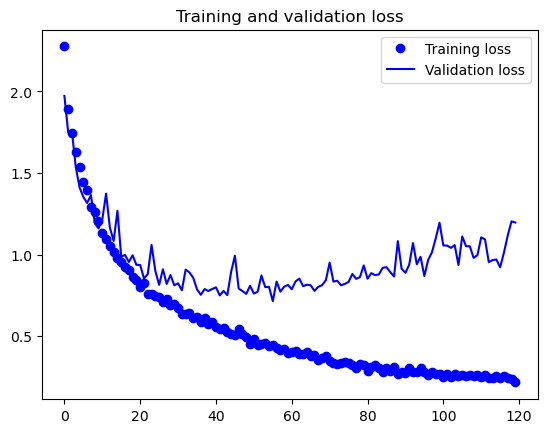

In [153]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Assignment 6.2.a

In [162]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape == (50000, 32, 32, 3))
print(x_test.shape == (10000, 32, 32, 3))
print(y_train.shape == (50000, 1))
print(y_test.shape == (10000, 1))

num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

True
True
True
True


In [175]:
model = models.Sequential()

model = models.Sequential()

# example of a 3-block vgg style architecture
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


# model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
# model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Flatten())
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
# model.add(layers.Dense(10, activation='softmax'))


model.summary()

model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate=0.001), metrics=['acc'])

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_90 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_9 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_91 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_64 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_23 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_92 (Conv2D)          (None, 16, 16, 64)      

In [173]:
train_datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_datagen.fit(x_train)
test_datagen.fit(x_test)

train_generator = train_datagen.flow(x_train, y_train, batch_size=64)

validation_generator = test_datagen.flow(x_test, y_test, batch_size=64)

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (128, 32, 32, 3)
labels batch shape: (128, 10)


In [176]:
int(x_train.shape[0] / 64)

781

In [178]:
history = model.fit(train_generator, steps_per_epoch=64, epochs=120, validation_data=(validation_generator), validation_steps=64)

# history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/120
64/64 [==============================] - 9s 137ms/step - loss: 2.0436 - acc: 0.2343 - val_loss: 2.3588 - val_acc: 0.1653
Epoch 2/120
64/64 [==============================] - 8s 128ms/step - loss: 1.9973 - acc: 0.2444 - val_loss: 1.8713 - val_acc: 0.2878
Epoch 3/120
64/64 [==============================] - 8s 128ms/step - loss: 1.9729 - acc: 0.2523 - val_loss: 1.7755 - val_acc: 0.3440
Epoch 4/120
64/64 [==============================] - 8s 131ms/step - loss: 1.9304 - acc: 0.2686 - val_loss: 1.9695 - val_acc: 0.3109
Epoch 5/120
64/64 [==============================] - 8s 128ms/step - loss: 1.8876 - acc: 0.2825 - val_loss: 1.7573 - val_acc: 0.3462
Epoch 6/120
64/64 [==============================] - 8s 130ms/step - loss: 1.8643 - acc: 0.3041 - val_loss: 1.5757 - val_acc: 0.4089
Epoch 7/120
64/64 [==============================] - 8s 129ms/step - loss: 1.8317 - acc: 0.3204 - val_loss: 1.9654 - val_acc: 0.3473
Epoch 8/120
64/64 [==============================] - 8s 128ms/step - 

In [179]:
model.save('results/cifar10_model_augmented.h5')

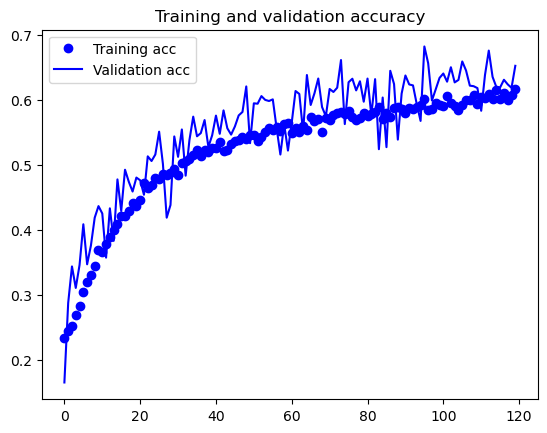

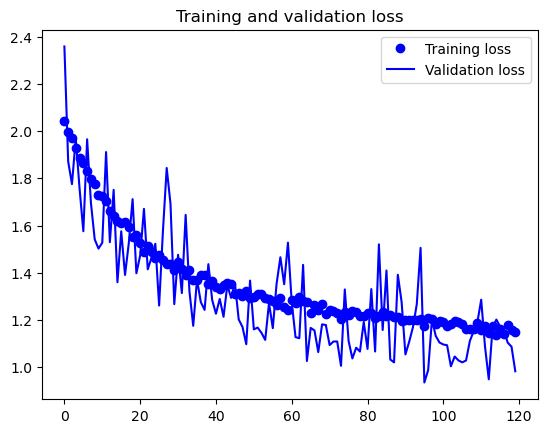

In [181]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()